In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
df = pd.read_csv("ultimate_dataset.csv")
df

,Unnamed: 0,Churn,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,BarService,Age,Gender,avg_satisfaction,avg_accomodation,avg_reception,avg_catering,avg_key_factors,RewardPoints_bins,Age_bin
0,0,churn,yes,business,single,4907.0,3.0,4.0,1.0,4.0,...,4.0,48,F,3.285714,3.2,3.6,2.5,3.5,2,Mid_adult
1,1,nochurn,yes,business,single,6724.0,1.0,1.0,1.0,1.0,...,2.0,57,M,3.142857,3.8,3.2,1.5,3.0,2,Older_adult
2,2,churn,yes,business,single,4365.0,3.0,3.0,3.0,3.0,...,1.0,49,M,2.714286,2.6,3.0,2.0,3.0,1,Mid_adult
3,3,nochurn,yes,leisure,double,3849.0,1.0,1.0,1.0,1.0,...,3.0,29,F,3.142857,3.4,3.6,2.0,2.5,1,Young_adult
4,4,nochurn,yes,business,single,5376.0,2.0,2.0,3.0,2.0,...,5.0,33,M,3.571429,3.6,3.4,4.0,3.5,2,Young_adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,15581,churn,no,business,double,4968.0,2.0,0.0,2.0,2.0,...,3.0,34,F,2.714286,3.2,2.2,2.5,3.0,2,Young_adult
15582,15582,churn,no,business,double,4970.0,3.0,3.0,3.0,3.0,...,5.0,22,F,3.571429,3.2,4.0,4.0,3.0,2,Young_adult
15583,15583,nochurn,yes,business,single,4046.0,1.0,1.0,1.0,1.0,...,4.0,58,M,3.214286,3.2,3.8,2.5,2.5,1,Older_adult
15584,15584,nochurn,yes,leisure,double,5155.0,4.0,3.0,4.0,4.0,...,5.0,30,M,4.071429,4.4,4.0,4.5,3.0,2,Young_adult


In [3]:
ds = df[['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi', 'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace', 'CheckOut', 'Checkin', 'Cleanliness', 'BarService']]

In [4]:
ds

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0
1,1.0,1.0,1.0,1.0,5.0,3.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0
2,3.0,3.0,3.0,3.0,1.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0
3,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
4,2.0,2.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,2.0,0.0,2.0,2.0,3.0,2.0,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0
15582,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0
15583,1.0,1.0,1.0,1.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
15584,4.0,3.0,4.0,4.0,5.0,4.0,5.0,5.0,2.0,5.0,4.0,3.0,4.0,5.0


Text(0.5, 1.0, 'Correlation Heats')

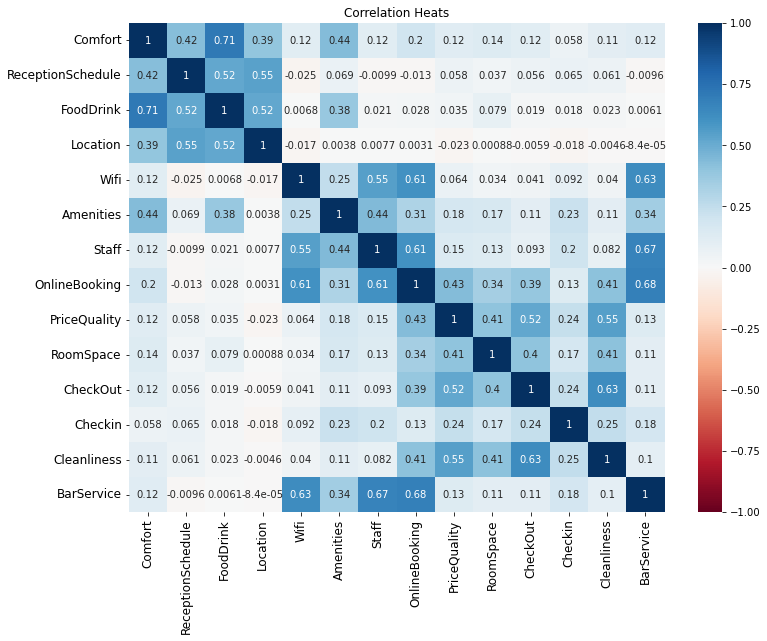

In [5]:
plt.figure(figsize=(12,9))
s= sns.heatmap(ds.corr(),
               annot=True,
               cmap='RdBu',
               vmin=-1,
               vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heats')

In [6]:
df2 = pd.get_dummies(ds, drop_first = True)

In [7]:
df2

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,3.0,3.0,3.0,4.0,3.0,4.0
1,1.0,1.0,1.0,1.0,5.0,3.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,2.0
2,3.0,3.0,3.0,3.0,1.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0,1.0
3,1.0,1.0,1.0,1.0,4.0,4.0,5.0,4.0,4.0,4.0,4.0,4.0,4.0,3.0
4,2.0,2.0,3.0,2.0,5.0,5.0,5.0,5.0,5.0,3.0,4.0,1.0,3.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15581,2.0,0.0,2.0,2.0,3.0,2.0,4.0,3.0,4.0,5.0,1.0,3.0,4.0,3.0
15582,3.0,3.0,3.0,3.0,5.0,3.0,5.0,5.0,3.0,1.0,3.0,4.0,4.0,5.0
15583,1.0,1.0,1.0,1.0,3.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0
15584,4.0,3.0,4.0,4.0,5.0,4.0,5.0,5.0,2.0,5.0,4.0,3.0,4.0,5.0


Text(0.5, 1.0, 'Correlation Heats')

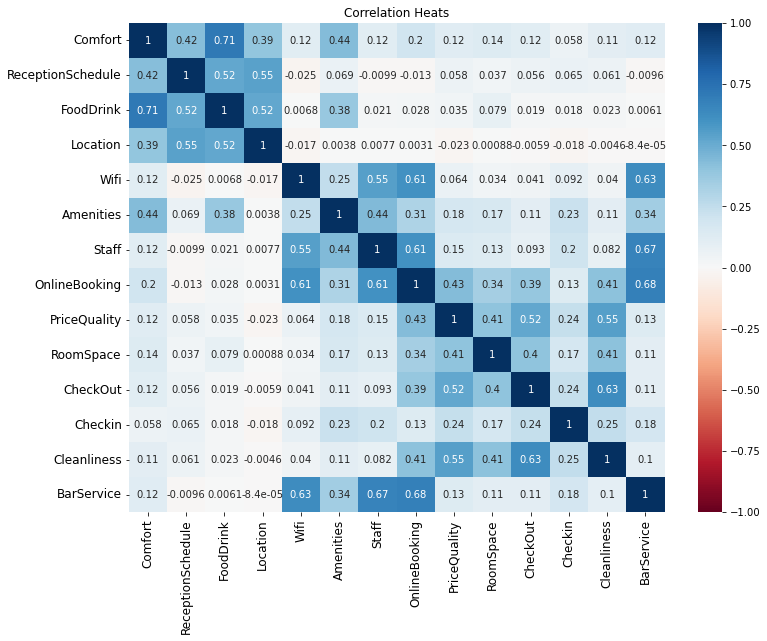

In [8]:
plt.figure(figsize=(12,9))
s= sns.heatmap(df2.corr(),
               annot=True,
               cmap='RdBu',
               vmin=-1,
               vmax=1)
s.set_yticklabels(s.get_yticklabels(), rotation=0, fontsize=12)
s.set_xticklabels(s.get_xticklabels(), rotation=90, fontsize=12)
plt.title('Correlation Heats')

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(df2)

In [10]:
scaler = StandardScaler()

In [11]:
scaled_X = scaler.fit_transform(df2)

In [12]:
from sklearn.decomposition import PCA

## N=2

In [48]:
pca_model = PCA (n_components=2)

In [49]:
pca_model.fit(scaled_X)

PCA(n_components=2)

In [50]:
pc_results = pca_model.transform(scaled_X)

In [51]:
pca_model.components_

array([[-0.22696172, -0.1001336 , -0.15022869, -0.0735796 , -0.28716322,
        -0.28941872, -0.3372133 , -0.42306929, -0.28979619, -0.24702047,
        -0.27326929, -0.19178999, -0.27770502, -0.34347075],
       [-0.43712843, -0.45501653, -0.52379903, -0.45236602,  0.14401732,
        -0.1148582 ,  0.13478811,  0.16301204,  0.07642399,  0.03687949,
         0.07484449,  0.04520435,  0.07586835,  0.15363022]])

In [57]:
pca_X = pca_model.fit_transform(scaled_X)

In [52]:
df2_comp = pd.DataFrame(pca_model.components_, index = ['PC1', 'PC2'], columns=df2.columns)

C:\Users\m13ar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

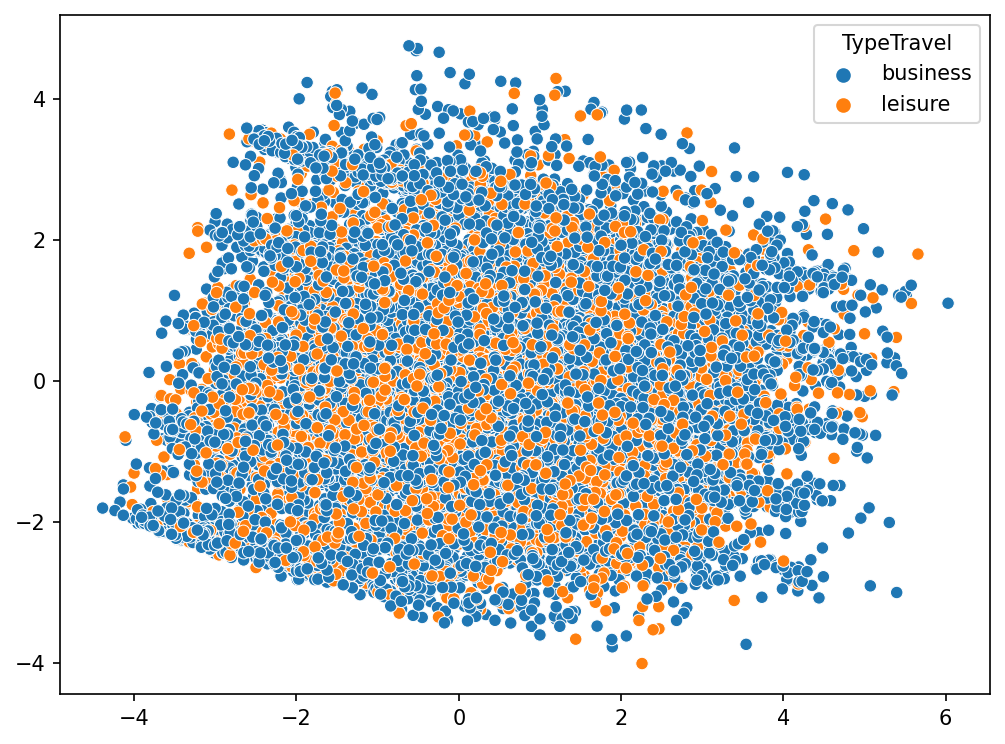

In [61]:
plt.figure(figsize=(8,6), dpi=150)
sns.scatterplot(pca_X[:,0], pca_X[:,1], hue=df['TypeTravel'])

In [18]:
df2_comp

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
PC1,-0.226962,-0.100134,-0.150228,-0.073580,-0.287163,-0.289419,-0.337213,-0.423069,-0.289796,-0.247021,-0.273269,-0.191790,-0.277705,-0.343471
PC2,-0.437128,-0.455018,-0.523799,-0.452365,0.144019,-0.114859,0.134790,0.163012,0.076424,0.036879,0.074844,0.045205,0.075869,0.153627


<AxesSubplot:>

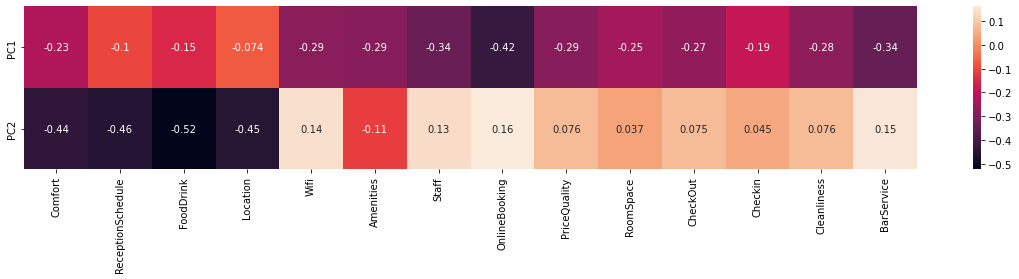

In [19]:
plt.figure(figsize = (20,3))
sns.heatmap(df2_comp, annot = True)

## N=3

In [62]:
pca_model = PCA (n_components=3)

In [63]:
pca_model.fit(scaled_X)

PCA(n_components=3)

In [64]:
pc_results = pca_model.transform(scaled_X)

In [65]:
pca_X = pca_model.fit_transform(scaled_X)

In [23]:
df3_comp = pd.DataFrame(pca_model.components_, index = ['PC1', 'PC2', 'PC3'], columns=df2.columns)

<AxesSubplot:>

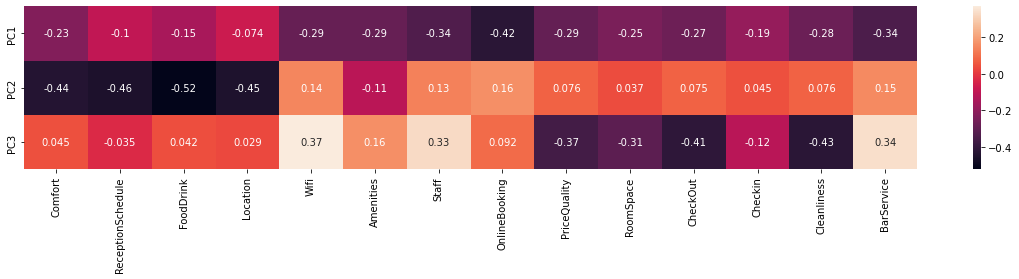

In [24]:
plt.figure(figsize = (20,3))
sns.heatmap(df3_comp, annot = True)

## N=4

In [25]:
pca_model = PCA (n_components=4)

In [26]:
pca_model.fit(scaled_X)

PCA(n_components=4)

In [27]:
pc_results = pca_model.transform(scaled_X)

In [28]:
df4_comp = pd.DataFrame(pca_model.components_, index = ['PC1', 'PC2', 'PC3', 'PC4'], columns=df2.columns)

In [30]:
df4_comp

,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
PC1,-0.226962,-0.100134,-0.150228,-0.073580,-0.287163,-0.289419,-0.337213,-0.423069,-0.289796,-0.247021,-0.273269,-0.191790,-0.277705,-0.343471
PC2,-0.437128,-0.455017,-0.523801,-0.452365,0.144018,-0.114857,0.134788,0.163012,0.076424,0.036880,0.074844,0.045204,0.075869,0.153630
PC3,0.045465,-0.034503,0.041591,0.028758,0.370690,0.161413,0.330000,0.091985,-0.366012,-0.308846,-0.414690,-0.115862,-0.425914,0.342367
PC4,-0.166473,0.259938,-0.127809,0.390908,0.223759,-0.602828,-0.022660,0.252439,0.027767,-0.039099,0.105219,-0.464250,0.110634,0.129334


<AxesSubplot:>

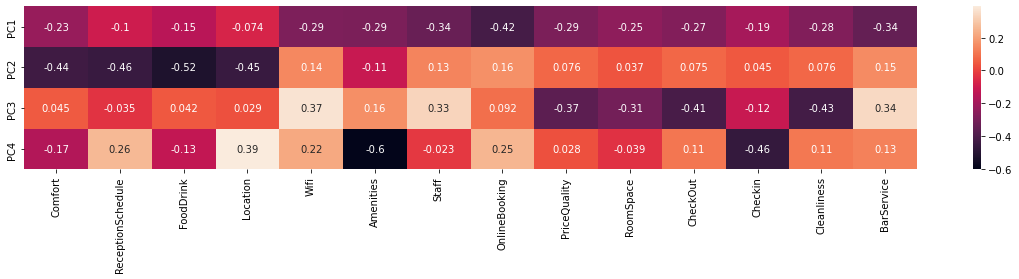

In [29]:
plt.figure(figsize = (20,3))
sns.heatmap(df4_comp, annot = True)

In [45]:
pca_model.explained_variance_ratio_

array([0.27537535, 0.18179311, 0.15241082, 0.07334162])

In [32]:
np.sum(pca_model.explained_variance_ratio_)

0.682920896741427

In [35]:
pca_14 = PCA(n_components=14)

In [36]:
pca_14.fit(scaled_X)

PCA(n_components=14)

In [38]:
np.sum(pca_14.explained_variance_ratio_)

1.0

In [40]:
explained_variance = []
for n in range(1,14):
    
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Variance explained')

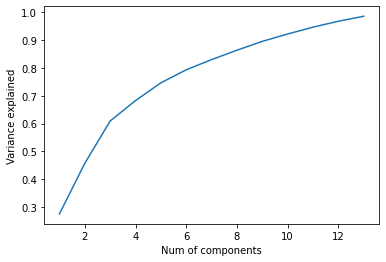

In [41]:
plt.plot(range(1,14), explained_variance)
plt.xlabel('Num of components')
plt.ylabel('Variance explained')

In [46]:
pc1

NameError: name 'pc1' is not defined